# TLS Version Distribution Analysis for Multiple TLDs

This notebook analyzes the distribution of TLS versions from the datasets for multiple TLDs (be, cc, cn, com). We filter out domains where the connection was not successful (`connect_ok` is false) and visualize the distribution using a donut chart for each TLD.


In [8]:
import duckdb
import matplotlib.pyplot as plt
import os

# Define the TLDs and their corresponding file paths
tld_file_mapping = {
    'be': '../data/data_be/tls_features.parquet',
    'cc': '../data/data_cc/cc_tls_features.parquet',
    'cn': '../data/data_cn/cn_tls_features.parquet',
    'com': '../data/data_com/com_tls_features.parquet'
}

# Check if all files exist
for tld, file_path in tld_file_mapping.items():
    if os.path.exists(file_path):
        print(f"File found for {tld}: {file_path}")
    else:
        print(f"Error: File not found for {tld}: {file_path}")


File found for be: ../data/data_be/tls_features.parquet
File found for cc: ../data/data_cc/cc_tls_features.parquet
File found for cn: ../data/data_cn/cn_tls_features.parquet
File found for com: ../data/data_com/com_tls_features.parquet


In [9]:
# Connect to DuckDB
con = duckdb.connect(database=':memory:')

# Loop through each TLD and analyze its data
for tld, file_path in tld_file_mapping.items():
    if not os.path.exists(file_path):
        print(f"Skipping {tld} as file does not exist: {file_path}")
        continue
        
    print(f"\n\n=== Analyzing TLS Version Distribution for {tld.upper()} ===\n")
    
    # Display schema
    schema_query = f"""DESCRIBE SELECT * FROM '{file_path}'"""
    schema_df = con.execute(schema_query).fetchdf()
    print(f"Schema of the parquet file for {tld}:")
    display(schema_df)
    
    # Display preview
    preview_query = f"""SELECT * FROM '{file_path}' LIMIT 5"""
    preview_df = con.execute(preview_query).fetchdf()
    print(f"\nPreview of the data for {tld}:")
    display(preview_df)




=== Analyzing TLS Version Distribution for BE ===

Schema of the parquet file for be:


,column_name,column_type,null,key,default,extra
0,visit_id,VARCHAR,YES,None,None,None
1,domain_name,VARCHAR,YES,None,None,None
2,host_name,VARCHAR,YES,None,None,None
3,host_name_matches_certificate,BOOLEAN,YES,None,None,None
4,chain_trusted_by_java_platform,BOOLEAN,YES,None,None,None
5,certificate_expired,BOOLEAN,YES,None,None,None
6,certificate_too_soon,BOOLEAN,YES,None,None,None
7,crawl_timestamp,DOUBLE,YES,None,None,None
8,scan_timestamp,DOUBLE,YES,None,None,None
9,ip,VARCHAR,YES,None,None,None



Preview of the data for be:


,visit_id,domain_name,host_name,host_name_matches_certificate,chain_trusted_by_java_platform,certificate_expired,certificate_too_soon,crawl_timestamp,scan_timestamp,ip,...,error_tls_1_0,error_ssl_3_0,error_ssl_2_0,millis_tls_1_3,millis_tls_1_2,millis_tls_1_1,millis_tls_1_0,millis_ssl_3_0,millis_ssl_2_0,certificate_chain_fingerprints
0,180899,compufit.be,compufit.be,False,False,False,False,1.746736e+09,1.746736e+09,None,...,Unknown host,Unknown host,Unknown host,0,0,0,0,0,0,[]
1,180899,compufit.be,www.compufit.be,False,False,False,False,1.746736e+09,1.746736e+09,None,...,Unknown host,Unknown host,Unknown host,0,0,0,0,0,0,[]
2,480702,gcbf.be,gcbf.be,True,True,False,False,1.746736e+09,1.746736e+09,193.70.58.226,...,(protocol_version) Received fatal alert: proto...,Read timed out,None,2142,291,4053,184,4103,160,[b03af7a67584f75973e1b80d05e0e211d73260667f866...
3,480702,gcbf.be,www.gcbf.be,True,True,False,False,1.746736e+09,1.746736e+09,193.70.58.226,...,Connection timed out,(handshake_failure) Received fatal alert: hand...,None,4055,162,3000,3000,2115,453,[b03af7a67584f75973e1b80d05e0e211d73260667f866...
4,36257693,foodsourcebaits.be,foodsourcebaits.be,False,False,False,False,1.746659e+09,1.746659e+09,104.26.7.63,...,Connection timed out,Connection timed out,Connection timed out,0,0,0,0,0,0,[]




=== Analyzing TLS Version Distribution for CC ===

Schema of the parquet file for cc:


,column_name,column_type,null,key,default,extra
0,visit_id,VARCHAR,YES,None,None,None
1,domain_name,VARCHAR,YES,None,None,None
2,host_name,VARCHAR,YES,None,None,None
3,host_name_matches_certificate,BOOLEAN,YES,None,None,None
4,chain_trusted_by_java_platform,BOOLEAN,YES,None,None,None
5,certificate_expired,BOOLEAN,YES,None,None,None
6,certificate_too_soon,BOOLEAN,YES,None,None,None
7,crawl_timestamp,DOUBLE,YES,None,None,None
8,scan_timestamp,DOUBLE,YES,None,None,None
9,ip,VARCHAR,YES,None,None,None



Preview of the data for cc:


,visit_id,domain_name,host_name,host_name_matches_certificate,chain_trusted_by_java_platform,certificate_expired,certificate_too_soon,crawl_timestamp,scan_timestamp,ip,...,error_tls_1_0,error_ssl_3_0,error_ssl_2_0,millis_tls_1_3,millis_tls_1_2,millis_tls_1_1,millis_tls_1_0,millis_ssl_3_0,millis_ssl_2_0,certificate_chain_fingerprints
0,5481911,0033k.cc,0033k.cc,True,True,False,False,1.747117e+09,1.747117e+09,156.236.188.71,...,(protocol_version) Received fatal alert: proto...,(handshake_failure) Received fatal alert: hand...,None,338,4183,692,326,343,343,[47f2c9e08a95300ffb9d024fe1e73e4aa44bf88340873...
1,5481911,0033k.cc,www.0033k.cc,False,True,False,False,1.747117e+09,1.747117e+09,156.236.187.142,...,(protocol_version) Received fatal alert: proto...,(handshake_failure) Received fatal alert: hand...,None,344,4205,701,321,330,348,[e056d7efd113a4a0e9fc61fa31e12bcf44653729a5f4d...
2,5483566,2244k.cc,2244k.cc,False,False,False,False,1.747117e+09,1.747117e+09,None,...,Unknown host,Unknown host,Unknown host,0,0,0,0,0,0,[]
3,5483566,2244k.cc,www.2244k.cc,False,False,False,False,1.747117e+09,1.747117e+09,None,...,Unknown host,Unknown host,Unknown host,0,0,0,0,0,0,[]
4,5861472,adcdzj0rbm.cc,adcdzj0rbm.cc,False,False,False,False,1.747118e+09,1.747118e+09,None,...,Unknown host,Unknown host,Unknown host,0,0,0,0,0,0,[]




=== Analyzing TLS Version Distribution for CN ===

Schema of the parquet file for cn:


,column_name,column_type,null,key,default,extra
0,visit_id,VARCHAR,YES,None,None,None
1,domain_name,VARCHAR,YES,None,None,None
2,host_name,VARCHAR,YES,None,None,None
3,host_name_matches_certificate,BOOLEAN,YES,None,None,None
4,chain_trusted_by_java_platform,BOOLEAN,YES,None,None,None
5,certificate_expired,BOOLEAN,YES,None,None,None
6,certificate_too_soon,BOOLEAN,YES,None,None,None
7,crawl_timestamp,DOUBLE,YES,None,None,None
8,scan_timestamp,DOUBLE,YES,None,None,None
9,ip,VARCHAR,YES,None,None,None



Preview of the data for cn:


,visit_id,domain_name,host_name,host_name_matches_certificate,chain_trusted_by_java_platform,certificate_expired,certificate_too_soon,crawl_timestamp,scan_timestamp,ip,...,error_tls_1_0,error_ssl_3_0,error_ssl_2_0,millis_tls_1_3,millis_tls_1_2,millis_tls_1_1,millis_tls_1_0,millis_ssl_3_0,millis_ssl_2_0,certificate_chain_fingerprints
0,132897,tryweike.cn,tryweike.cn,False,True,False,False,1.747088e+09,1.747088e+09,42.193.142.64,...,None,(handshake_failure) Received fatal alert: hand...,None,455,1646,955,970,478,484,[0e56ed1c58ee5d6ad91b80e933fab28df4f911822ffc3...
1,132897,tryweike.cn,www.tryweike.cn,False,True,False,False,1.747088e+09,1.747088e+09,42.193.142.64,...,None,(handshake_failure) Received fatal alert: hand...,None,493,915,941,984,451,471,[0e56ed1c58ee5d6ad91b80e933fab28df4f911822ffc3...
2,151382,nycyy666.cn,nycyy666.cn,True,True,False,False,1.747088e+09,1.747088e+09,211.149.133.85,...,(protocol_version) Received fatal alert: proto...,(handshake_failure) Received fatal alert: hand...,None,464,895,949,463,452,466,[21cab0c1468317608284c14743770e0182d1763ebb08f...
3,151382,nycyy666.cn,www.nycyy666.cn,True,True,False,False,1.747088e+09,1.747088e+09,211.149.133.85,...,(protocol_version) Received fatal alert: proto...,(handshake_failure) Received fatal alert: hand...,None,454,901,968,448,450,452,[21cab0c1468317608284c14743770e0182d1763ebb08f...
4,170827,mnnubio.cn,mnnubio.cn,True,True,False,False,1.747088e+09,1.747088e+09,121.204.148.15,...,None,Connection reset,Connection reset,444,1012,956,1044,426,528,[63d6f6d362392cebfb890e7417b08bb8a2e611e4e74ea...




=== Analyzing TLS Version Distribution for COM ===

Schema of the parquet file for com:


,column_name,column_type,null,key,default,extra
0,visit_id,VARCHAR,YES,None,None,None
1,domain_name,VARCHAR,YES,None,None,None
2,host_name,VARCHAR,YES,None,None,None
3,host_name_matches_certificate,BOOLEAN,YES,None,None,None
4,chain_trusted_by_java_platform,BOOLEAN,YES,None,None,None
5,certificate_expired,BOOLEAN,YES,None,None,None
6,certificate_too_soon,BOOLEAN,YES,None,None,None
7,crawl_timestamp,DOUBLE,YES,None,None,None
8,scan_timestamp,DOUBLE,YES,None,None,None
9,ip,VARCHAR,YES,None,None,None



Preview of the data for com:


,visit_id,domain_name,host_name,host_name_matches_certificate,chain_trusted_by_java_platform,certificate_expired,certificate_too_soon,crawl_timestamp,scan_timestamp,ip,...,error_tls_1_0,error_ssl_3_0,error_ssl_2_0,millis_tls_1_3,millis_tls_1_2,millis_tls_1_1,millis_tls_1_0,millis_ssl_3_0,millis_ssl_2_0,certificate_chain_fingerprints
0,45572,logikblok.com,logikblok.com,False,False,False,False,1.747313e+09,1.747313e+09,None,...,Unknown host,Unknown host,Unknown host,0,0,0,0,0,0,[]
1,45572,logikblok.com,www.logikblok.com,False,False,False,False,1.747313e+09,1.747313e+09,None,...,Unknown host,Unknown host,Unknown host,0,0,0,0,0,0,[]
2,45671,hyvechat.com,hyvechat.com,False,False,False,False,1.747313e+09,1.747313e+09,3.33.152.147,...,Connection timed out,Connection timed out,Connection timed out,0,0,0,0,0,0,[]
3,45671,hyvechat.com,www.hyvechat.com,False,False,False,False,1.747313e+09,1.747313e+09,15.197.142.173,...,Connection timed out,Connection timed out,Connection timed out,0,0,0,0,0,0,[]
4,45897,midnitesurprise.com,midnitesurprise.com,False,False,False,False,1.747313e+09,1.747313e+09,None,...,Unknown host,Unknown host,Unknown host,0,0,0,0,0,0,[]


## Analyzing TLS Version Distribution for Each TLD

Now we'll analyze the distribution of TLS versions for each TLD, filtering out domains where the connection was not successful (connect_ok is false).


In [10]:
# Loop through each TLD and analyze TLS version distribution
for tld, file_path in tld_file_mapping.items():
    if not os.path.exists(file_path):
        continue
        
    print(f"\n\n=== TLS Version Distribution for {tld.upper()} ===\n")
    
    # Query for high/low version combinations
    subquery = f"""
    SELECT high, low, count(1) as count from
        (SELECT visit_id, domain_name, max(highest_version_supported) as high, max(lowest_version_supported) as low
        FROM '{file_path}'
        where connect_ok
        and highest_version_supported is not Null
        and lowest_version_supported is not NUll
        is True group by visit_id, domain_name) group by high, low
    """
    result_df = con.execute(subquery).fetchdf()
    print(f"High/Low version combinations for {tld}:")
    display(result_df)
    
    # Query for high version distribution
    query = f"""
    SELECT low, sum(count) as count FROM (SELECT high, low, count(1) as count from
        (SELECT visit_id, domain_name, max(highest_version_supported) as high, max(lowest_version_supported) as low
        FROM '{file_path}'
        where connect_ok
        and highest_version_supported is not Null
        and lowest_version_supported is not NUll
        and highest_version_supported not like 'SSLv2'
        is True group by visit_id, domain_name) group by high, low)
        group by low order by low
    """
    result_df = con.execute(query).fetchdf()
    print(f"\nHighest version distribution for {tld}:")
    display(result_df)




=== TLS Version Distribution for BE ===

High/Low version combinations for be:


,high,low,count
0,TLSv1.2,TLSv1.2,907
1,TLSv1.2,TLSv1,263
2,TLSv1.2,TLSv1.1,150
3,TLSv1.1,SSLv3,1
4,TLSv1.3,TLSv1.3,2200
5,TLSv1,SSLv3,1
6,TLSv1.3,TLSv1.1,745
7,TLSv1.3,TLSv1,1589
8,TLSv1.1,TLSv1,77
9,TLSv1.1,TLSv1.1,71



Highest version distribution for be:


,low,count
0,SSLv3,5.0
1,TLSv1,1992.0
2,TLSv1.1,966.0
3,TLSv1.2,3550.0
4,TLSv1.3,2200.0




=== TLS Version Distribution for CC ===

High/Low version combinations for cc:


,high,low,count
0,TLSv1.2,TLSv1.2,44
1,TLSv1.3,TLSv1,425
2,TLSv1.3,TLSv1.1,133
3,TLSv1.2,SSLv3,2
4,TLSv1.1,TLSv1,1
5,TLSv1.3,TLSv1.2,243
6,TLSv1.2,TLSv1,93
7,TLSv1.2,TLSv1.1,2
8,TLSv1,SSLv2,1
9,TLSv1.3,TLSv1.3,15



Highest version distribution for cc:


,low,count
0,SSLv2,1.0
1,SSLv3,2.0
2,TLSv1,519.0
3,TLSv1.1,135.0
4,TLSv1.2,287.0
5,TLSv1.3,15.0




=== TLS Version Distribution for CN ===

High/Low version combinations for cn:


,high,low,count
0,TLSv1.2,TLSv1.2,30
1,TLSv1,TLSv1,1
2,TLSv1.3,TLSv1.3,5
3,TLSv1.3,TLSv1,23
4,TLSv1.3,TLSv1.1,36
5,TLSv1.1,TLSv1.1,4
6,TLSv1.2,SSLv3,3
7,TLSv1.3,TLSv1.2,51
8,TLSv1.2,TLSv1.1,3
9,TLSv1.2,TLSv1,60



Highest version distribution for cn:


,low,count
0,SSLv3,3.0
1,TLSv1,84.0
2,TLSv1.1,43.0
3,TLSv1.2,81.0
4,TLSv1.3,5.0




=== TLS Version Distribution for COM ===

High/Low version combinations for com:


,high,low,count
0,TLSv1.2,TLSv1.2,890
1,SSLv2,SSLv2,1
2,TLSv1,TLSv1,1
3,TLSv1.3,TLSv1.3,104
4,TLSv1.3,TLSv1,1399
5,TLSv1.3,TLSv1.1,178
6,TLSv1.2,SSLv3,12
7,TLSv1.1,TLSv1,1
8,TLSv1.3,TLSv1.2,8499
9,TLSv1.2,TLSv1,320



Highest version distribution for com:


,low,count
0,SSLv2,1.0
1,SSLv3,12.0
2,TLSv1,1721.0
3,TLSv1.1,202.0
4,TLSv1.2,9389.0
5,TLSv1.3,104.0


## Visualizing TLS Version Distribution for Each TLD

Now we'll create visualizations of the TLS version distribution for each TLD using donut charts.




=== TLS Version Distribution Visualization for BE ===



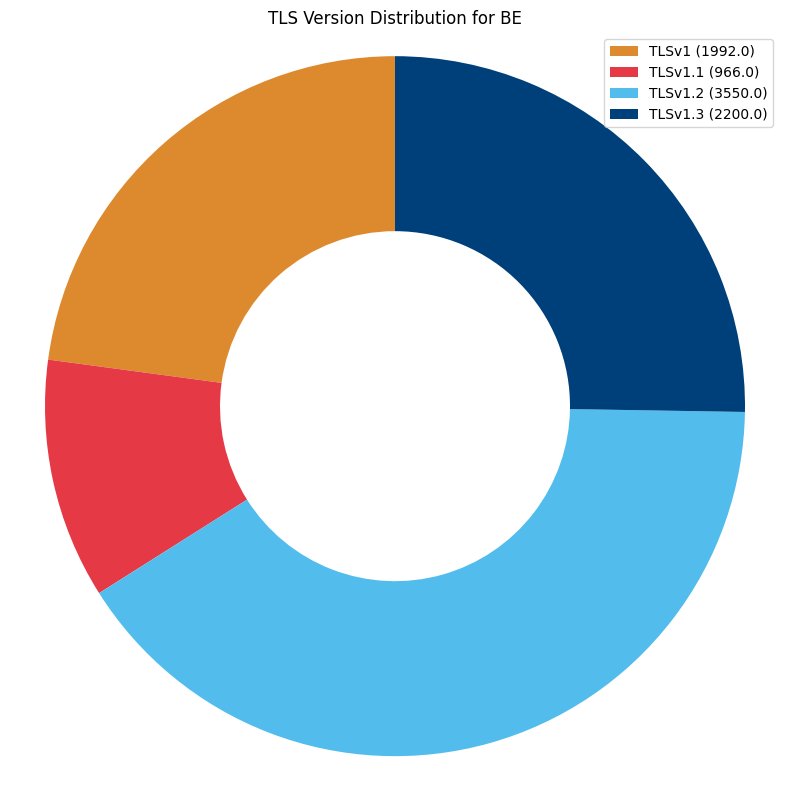


TLS Version Distribution Summary for be:


,low,count
0,TLSv1,1992.0
1,TLSv1.1,966.0
2,TLSv1.2,3550.0
3,TLSv1.3,2200.0




=== TLS Version Distribution Visualization for CC ===



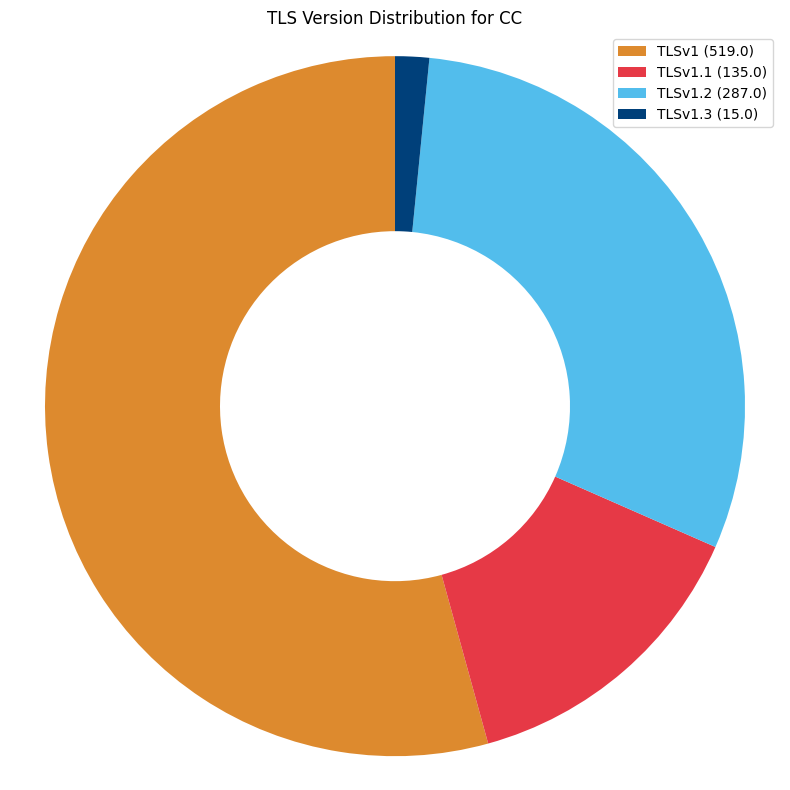


TLS Version Distribution Summary for cc:


,low,count
0,TLSv1,519.0
1,TLSv1.1,135.0
2,TLSv1.2,287.0
3,TLSv1.3,15.0




=== TLS Version Distribution Visualization for CN ===



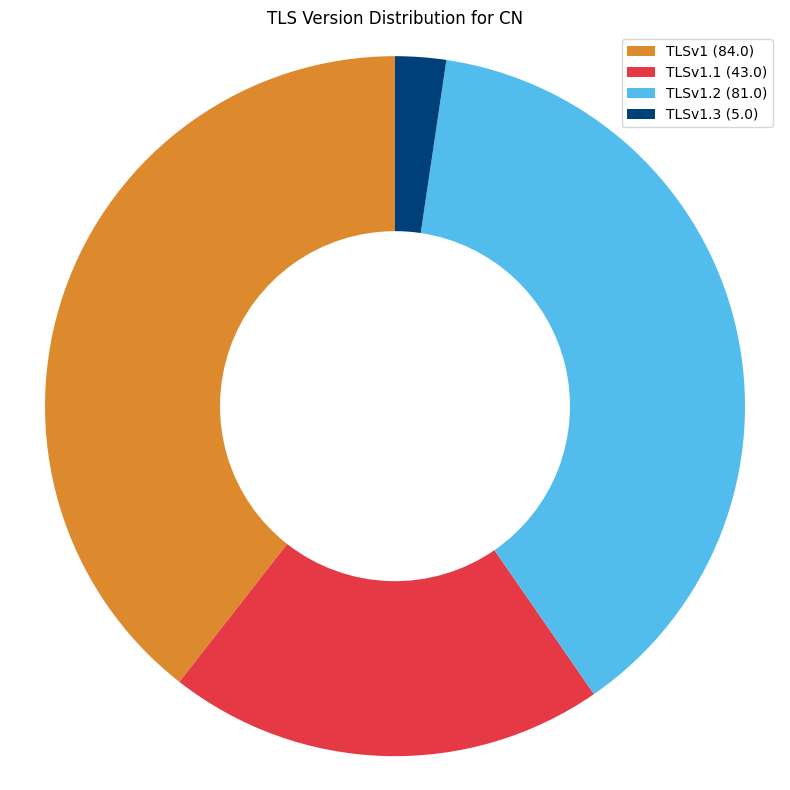


TLS Version Distribution Summary for cn:


,low,count
0,TLSv1,84.0
1,TLSv1.1,43.0
2,TLSv1.2,81.0
3,TLSv1.3,5.0




=== TLS Version Distribution Visualization for COM ===



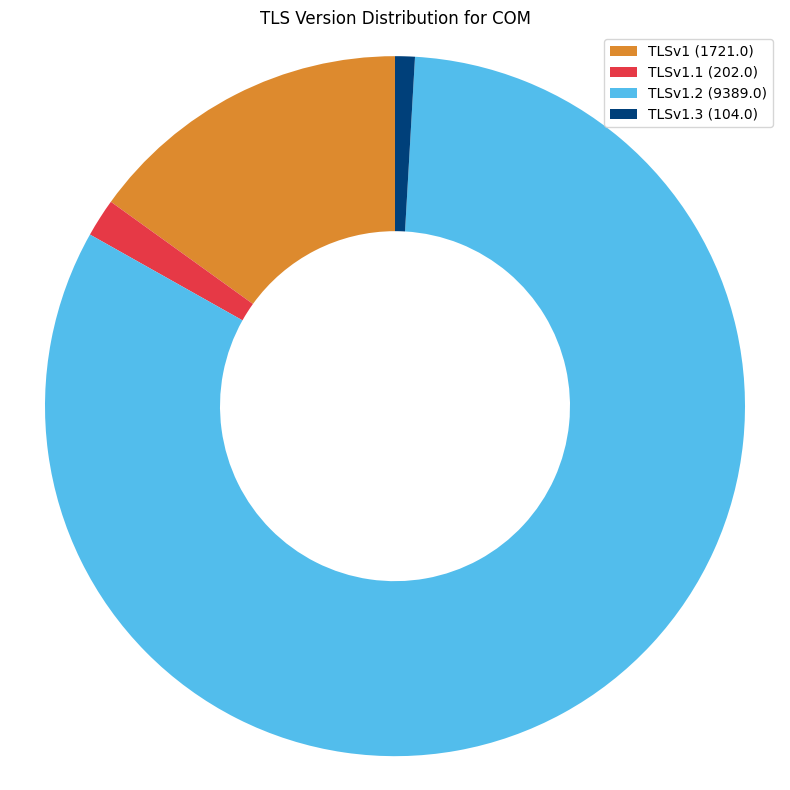


TLS Version Distribution Summary for com:


,low,count
0,TLSv1,1721.0
1,TLSv1.1,202.0
2,TLSv1.2,9389.0
3,TLSv1.3,104.0


In [12]:
# Loop through each TLD and create visualizations
for tld, file_path in tld_file_mapping.items():
    if not os.path.exists(file_path):
        continue
        
    print(f"\n\n=== TLS Version Distribution Visualization for {tld.upper()} ===\n")
    
    # Query for high version distribution
    query = f"""
    SELECT low, sum(count) as count FROM (SELECT high, low, count(1) as count from
        (SELECT visit_id, domain_name, max(highest_version_supported) as high, max(lowest_version_supported) as low
        FROM '{file_path}'
        where connect_ok
        and highest_version_supported is not Null
        and lowest_version_supported is not NUll
        and lowest_version_supported not like 'SSLv2'
        and lowest_version_supported not like 'SSLv3'
        is True group by visit_id, domain_name) group by high, low)
        group by low order by low
    """
    result_df = con.execute(query).fetchdf()
    
    if not result_df.empty:
        # Set up the figure with one subplot
        fig, ax1 = plt.subplots(1, 1, figsize=(8,8))
        
        # Donut Chart
        # Create custom legend labels with percentages
        legend_labels = [f"{row['low']} ({row['count']})" for _, row in result_df.iterrows()]
        
        # Remove autopct to not show percentages on the chart
        ax1.pie(result_df['count'], labels=None, startangle=90, shadow=False, 
               colors=["#DD8A2E", "#E63946","#52BDEC", "#00407A",  "#000000"],
               wedgeprops=dict(width=0.5))
        
        ax1.axis('equal')
        ax1.legend(legend_labels, loc='upper right')
        
        plt.title(f"TLS Version Distribution for {tld.upper()}")
        plt.tight_layout()
        
        # Save the figure
        plt.savefig(f"img/{tld.upper()}_TLS_LOW.png")
        plt.show()
        
        # Display the results in a table
        print(f"\nTLS Version Distribution Summary for {tld}:")
        display(result_df)
    else:
        print(f"No valid results available for visualization for {tld}. Please check the data.")